In [19]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
if (not os.path.exists('yelp_academic_dataset_business.json')) or (not os.path.exists('yelp_academic_dataset_review.json')):
    kaggle_path = os.path.expanduser('~/.kaggle')
    kaggle_json_path = os.path.join(kaggle_path, 'kaggle.json')
    if not os.path.exists(kaggle_json_path):
        from getpass import getpass
        kaggle_json = getpass('Insert kaggle.json:')
        os.makedirs(kaggle_path, exist_ok=True)
        with open(kaggle_json_path, 'w') as f:
            f.write(kaggle_json)
        os.chmod(kaggle_json_path, 0o600)
    !kaggle datasets download yelp-dataset/yelp-dataset
    !unzip yelp-dataset.zip yelp_academic_dataset_business.json yelp_academic_dataset_review.json
    !rm yelp-dataset.zip

Insert kaggle.json:··········
100% 4.46G/4.48G [01:00<00:01, 16.6MB/s]
100% 4.48G/4.48G [01:00<00:00, 79.1MB/s]
Archive:  yelp-dataset.zip
  inflating: yelp_academic_dataset_business.json  
  inflating: yelp_academic_dataset_review.json  


In [13]:
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
print("The dataset contains total {} businesses".format(len(business_df.index)))

The dataset contains 209393 businesses


In [14]:
business_df = business_df[business_df['categories'].notna()]
pizza_biz_df = business_df[business_df['categories'].str.contains("Pizza")]
print("Of those, {} businesses sell pizza".format(len(business_df.index)))
print("Here are a few examples")
pizza_biz_df.head()

Of those, 208869 businesses sell pizza
Here are a few examples


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
63,ZkzutF0P_u0C0yTulwaHkA,Lelulos Pizzeria,311 Unity Center Rd,Plum,PA,15239,40.489996,-79.779288,4.0,31,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Pizza","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
86,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,,Las Vegas,NV,89109,36.128561,-115.171130,4.5,11,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",{'Friday': '18:0-0:0'}
105,-C0AlwLuXpcP609madJZQQ,Pizzaville,"1030 Kennedy Circle, Unit 10",Milton,ON,L9T 0J9,43.508962,-79.837990,3.5,7,1,None,"Restaurants, Pizza","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
120,39lLJK_rrYY2NYomSsQdUA,Marco's Pizza,24335 Chagrin Blvd,Beachwood,OH,44122,41.465789,-81.506349,2.5,11,1,"{'RestaurantsDelivery': 'True', 'GoodForKids':...","Restaurants, Pizza",None
126,0y6alZmSLnPzmG5_kP5Quw,J J's Pizza,20542 Lorain Rd,Fairview Park,OH,44126,41.448341,-81.847644,4.5,21,1,"{'NoiseLevel': 'u'quiet'', 'WiFi': ''no'', 'Bu...","Pizza, Italian, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


Not everyone posts online reviews, it's a self selecting group. It takes some time to  write out a review and upload pictures. It's typical to see an extreme distribution where ratings are really high or really low but not in the middle. Let's check how the pizza business ratings are distributed.

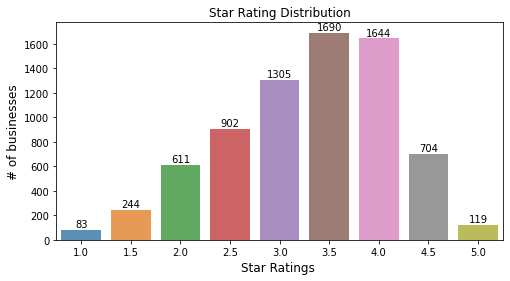

In [20]:
x=pizza_biz_df['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Interestingly, the opposite is true of our data. The distribution is somewhat normal with a slight negative skew. 